In [8]:
# Import modules:
import random

import gmsh
import sys

# Initialize gmsh:
gmsh.initialize()

a = 5
b = 1
p = 1.0 / 30
point1 = gmsh.model.geo.add_point(0, 0, 0, p)
point2 = gmsh.model.geo.add_point(0, b, 0, p)
point3 = gmsh.model.geo.add_point(a, b, 0, p)
point4 = gmsh.model.geo.add_point(a, 0, 0, p)

line1 = gmsh.model.geo.addLine(point1, point2)
line2 = gmsh.model.geo.addLine(point2, point3)
line3 = gmsh.model.geo.addLine(point3, point4)
line4 = gmsh.model.geo.addLine(point1, point4)

face1 = gmsh.model.geo.addCurveLoop([line1, line2, line3, -line4])

faces = []

circleLines = []

collections = 0

def generate_circle(r):
    x = random.uniform(0.0 + r, a - r)
    y = random.uniform(0.0 + r, b - r)
    global collections
    for i in circles:
        if iscollided(r, x, y, i[0], i[1], i[2]):
            collections += 1
            if collections > 1:
                return
            return generate_circle(r)
    collections = 0
    r1 = gmsh.model.geo.add_point(x, y, 0, p)
    r2 = gmsh.model.geo.add_point(x + r, y, 0, p)
    r3 = gmsh.model.geo.add_point(x, y + r, 0, p)
    r4 = gmsh.model.geo.add_point(x - r, y, 0, p)
    r5 = gmsh.model.geo.add_point(x, y - r, 0, p)
    line1 = gmsh.model.geo.addCircleArc(r2, r1, r3)
    line2 = gmsh.model.geo.addCircleArc(r3, r1, r4)
    line3 = gmsh.model.geo.addCircleArc(r4, r1, r5)
    line4 = gmsh.model.geo.addCircleArc(r5, r1, r2)
    circleLines.append(line1)
    circleLines.append(line2)
    circleLines.append(line3)
    circleLines.append(line4)
    curve = gmsh.model.geo.addCurveLoop([line1, line2, line3, line4])
    faces.append(curve)
    circles.append([r, x, y])


def iscollided(circle1R, cirlce1x, circle1y, circle2R, circle2x, circle2y):
    maxDist = circle1R + circle2R
    maxDist *= maxDist
    dx = cirlce1x - circle2x
    dy = circle1y - circle2y
    currentdist = dx * dx + dy * dy
    return currentdist < maxDist

circles = []
#
for i in range(1000):
    r = 0.01
    collections = 0
    generate_circle(0.1)

faces.insert(0, face1)
gmsh.model.geo.add_plane_surface(faces, 1)

# gmsh.model.addPhysicalGroup(1, faces, 1)

# Create the relevant Gmsh data structures
# from Gmsh model.
gmsh.model.geo.synchronize()

faces.remove(face1)
#physical line
gmsh.model.addPhysicalGroup(1, circleLines)
gmsh.model.addPhysicalGroup(1, [line1])
gmsh.model.addPhysicalGroup(1, [line2, line4])
gmsh.model.addPhysicalGroup(1, [line3])
#physical surface
gmsh.model.addPhysicalGroup(2, [face1])
# Generate mesh:
gmsh.model.mesh.generate(2)
# Write mesh data:

gmsh.option.setNumber("Mesh.MshFileVersion", 2)

gmsh.write("GFG.msh")

# # Creates  graphical user interface
# if 'close' not in sys.argv:
#     gmsh.fltk.run()

# # It finalize the Gmsh API
gmsh.finalize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 10%] Meshing curve 3 (Line)
Info    : [ 10%] Meshing curve 4 (Line)
Info    : [ 10%] Meshing curve 5 (Circle)
Info    : [ 10%] Meshing curve 6 (Circle)
Info    : [ 10%] Meshing curve 7 (Circle)
Info    : [ 10%] Meshing curve 8 (Circle)
Info    : [ 10%] Meshing curve 9 (Circle)
Info    : [ 10%] Meshing curve 10 (Circle)
Info    : [ 10%] Meshing curve 11 (Circle)
Info    : [ 10%] Meshing curve 12 (Circle)
Info    : [ 10%] Meshing curve 13 (Circle)
Info    : [ 10%] Meshing curve 14 (Circle)
Info    : [ 10%] Meshing curve 15 (Circle)
Info    : [ 10%] Meshing curve 16 (Circle)
Info    : [ 10%] Meshing curve 17 (Circle)
Info    : [ 10%] Meshing curve 18 (Circle)
Info    : [ 10%] Meshing curve 19 (Circle)
Info    : [ 10%] Meshing curve 20 (Circle)
Info    : [ 10%] Meshing curve 21 (Circle)
Info    : [ 10%] Meshing curve 22 (Circle)
Info    : [ 10%] Meshing curve 23 (Circle)
Info

In [6]:
import meshio
def create_mesh(mesh, cell_type, prune_z=False):
    cells = mesh.get_cells_type(cell_type)
    cell_data = mesh.get_cell_data("gmsh:physical", cell_type)
    points = mesh.points[:, :2] if prune_z else mesh.points
    out_mesh = meshio.Mesh(points=points, cells={cell_type: cells}, cell_data={
                           "boundary": [cell_data]})
    return out_mesh

def meshToXml(msh_name, xml_name): 
    mesh_xdmf_file = xml_name+'.xdmf'
    facet_xdmf_file = xml_name+'_facets.xdmf'
    mesh = meshio.read(msh_name)
    line_mesh = create_mesh(mesh, "line", prune_z=True)
    meshio.write(facet_xdmf_file, line_mesh)
    print(mesh.get_cell_data("gmsh:physical", 'triangle'))
    # triangle_mesh = create_mesh(mesh, "triangle", prune_z=True)
    # meshio.write(mesh_xdmf_file, triangle_mesh)

In [7]:
meshToXml('GFG.msh', 'model')


[5 5 5 ... 5 5 5]


In [3]:
from dolfin import *

In [17]:

def get_mesh(model_file) -> Mesh:
    mesh = Mesh()
    with XDMFFile(model_file) as in_file:
        in_file.read(mesh)
    return mesh
def get_mesh_function(mesh, face_file, number) -> (MeshFunction):
    mvc = MeshValueCollection("size_t", mesh, number)
    with XDMFFile(face_file) as in_file:
        in_file.read(mvc, 'boundary')
    print(mvc.values())
    domains = MeshFunction("size_t", mesh, mvc)
    return domains

Solving linear variational problem.


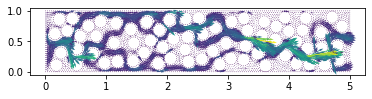

In [11]:
from __future__ import print_function
from dolfin import *
mesh = Mesh("test.xml")
boundary = MeshFunction("size_t", mesh, "test_facet_region.xml")


#plt.figure()
#plot(mesh)
#
#plt.figure()
#plot(sub_domains)

# Define function spaces
P2 = VectorElement("Lagrange", mesh.ufl_cell(), 2)
P1 = FiniteElement("Lagrange", mesh.ufl_cell(), 1)
TH = P2 * P1
W = FunctionSpace(mesh, TH)

W2 = FunctionSpace(mesh, P2)

# No-slip boundary condition for velocity
# x1 = 0, x1 = 1 and around the dolphin
#noslip = Constant((0, 0))
#bc0 = DirichletBC(W.sub(0), noslip, sub_domains, 0)

# Inflow boundary condition for velocity
# x0 = 1


inflow = Constant((1.0, 0.0))
bc1 = DirichletBC(W.sub(0), inflow, boundary, 2)


g = Constant((0.0, 0.0))
bc2 = DirichletBC(W.sub(0), g, boundary, 1)
bc3 = DirichletBC(W.sub(0), g, boundary, 3)
# Collect boundary conditions
bcs = [bc1, bc2, bc3]


# Define variational problem
(u, p) = TrialFunctions(W)
(v, q) = TestFunctions(W)
f = Constant((0, 0))
a = (inner(grad(u), grad(v)) - div(v)*p + q*div(u))*dx
L = inner(f, v)*dx

# Compute solution
w = Function(W)
solve(a == L, w, bcs)

# Split the mixed solution using deepcopy
# (needed for further computation on coefficient vector)
# (u, p) = w.split(True)

#print("Norm of velocity coefficient vector: %.15g" % u.vector().norm("l2"))
#print("Norm of pressure coefficient vector: %.15g" % p.vector().norm("l2"))

# # Split the mixed solution using a shallow copy
(u, p) = w.split()
ww = Function(W2)
ww.interpolate(u)
import matplotlib.pyplot as plt

plot(u)
# plt.savefig('./fotos/speed.png')
# # Save solution in VTK format
ufile_pvd = File("velocity.xml")
ufile_pvd << ww

## Plot solution
#plt.figure()
#plot(u, title="velocity")
#
#plt.figure()
#plot(p, title="pressure")
#
## Display plots
#plt.show()

In [1]:
from dolfin import *

mesh = Mesh('test.xml')
boundury = MeshFunction('size_t', mesh, 'test_facet_region.xml')
V = FunctionSpace(mesh, "Lagrange", 1)
Q = VectorFunctionSpace(mesh, "CG", 2)
h = CellDiameter(mesh)

u0 = Constant(0.0)
u0_find = interpolate(u0, V)
g = Constant(1.0)
bc = DirichletBC(V, g, boundury, 2)

u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0.0)
D = Constant(0.0001)
dt = 0.05
T = dt * 50
t = dt
velocity = Function(Q)
File("velocity.xml") >> velocity

F = v * (u - u0_find) * dx + dt * (v * dot(velocity, grad(u)) * dx + D * dot(grad(v), grad(u)) * dx)
r = u - u0_find + dt * (dot(velocity, grad(u)) - D * div(grad(u)) - f)
vnorm = sqrt(dot(velocity, velocity))
F += (h / (2.0 * vnorm)) * dot(velocity, grad(v)) * r * dx

a = lhs(F)
L = rhs(F)

u = Function(V)
u.assign(u0_find)

A = assemble(a)
bc.apply(A)

file = File("poisson.pvd")

import matplotlib.pyplot as plt

name = 0
step = 0
while t - T < DOLFIN_EPS:
    b = assemble(L)
    bc.apply(b)

    solve(A, u.vector(), b)
    u0_find.assign(u)
    file << u
    t += dt
    step = step + 1

Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified
